In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv("happiness.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [5]:
df.shape

(158, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
df.Family.unique()

array([1.34951, 1.40223, 1.36058, 1.33095, 1.32261, 1.31826, 1.28017,
       1.28907, 1.31967, 1.30923, 1.22393, 1.23788, 1.29704, 0.91451,
       1.24711, 1.23287, 1.21963, 1.36948, 1.28566, 1.12575, 1.28548,
       1.08182, 1.25596, 1.02   , 1.1985 , 1.29937, 1.12447, 1.0786 ,
       1.26038, 1.24823, 1.20643, 1.2089 , 1.24018, 1.26504, 1.08393,
       1.31379, 1.30203, 1.07617, 1.16594, 0.972  , 1.18354, 1.02507,
       1.04356, 1.34043, 1.26999, 1.25712, 0.95774, 0.99903, 1.21624,
       1.19777, 0.97841, 1.01528, 1.30477, 1.12241, 1.27385, 1.25745,
       1.14184, 0.97459, 1.23289, 1.27948, 1.07023, 0.79624, 1.11862,
       1.23617, 1.15102, 1.07008, 0.89318, 1.07772, 0.81198, 1.22668,
       0.98521, 1.05818, 1.22791, 1.08708, 0.91226, 0.94632, 1.15115,
       0.90432, 1.10395, 0.93793, 0.41411, 1.05392, 0.90557, 0.94675,
       0.91612, 0.88588, 1.00964, 1.13935, 1.09562, 1.03516, 0.95152,
       0.64095, 1.00232, 1.02626, 0.80434, 0.91916, 1.04103, 1.17202,
       0.73803, 1.30

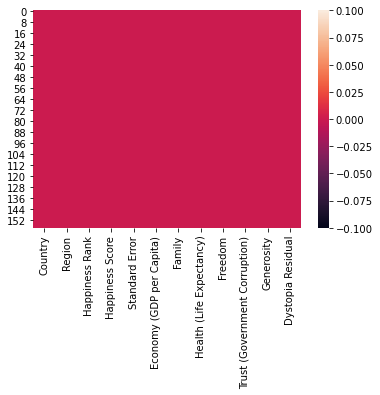

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


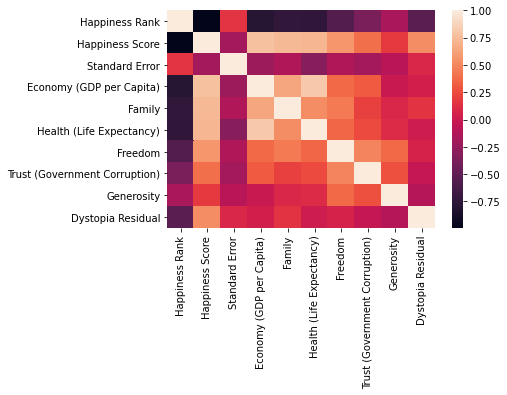

In [12]:
sns.heatmap(df.corr())

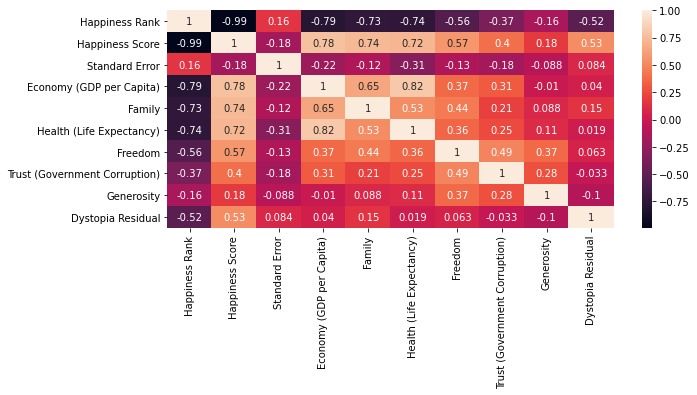

In [13]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)

In [14]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

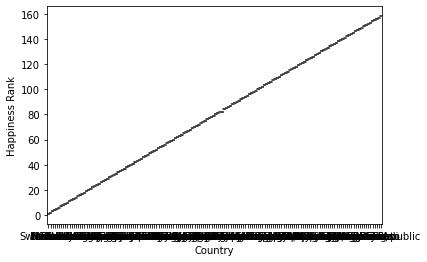

In [15]:
sns.boxplot(x='Country',y='Happiness Rank',data=df)

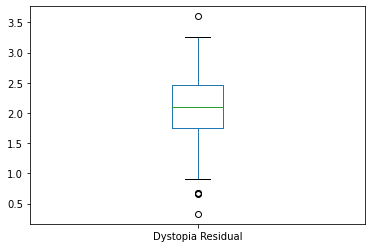

In [16]:
df['Dystopia Residual'].plot.box()

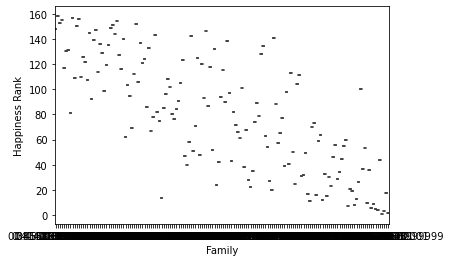

In [17]:
sns.boxplot(x='Family',y='Happiness Rank',data=df)

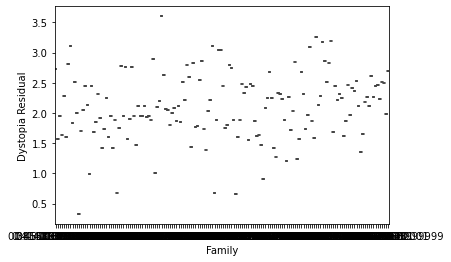

In [18]:
sns.boxplot(x='Family',y='Dystopia Residual',data=df)

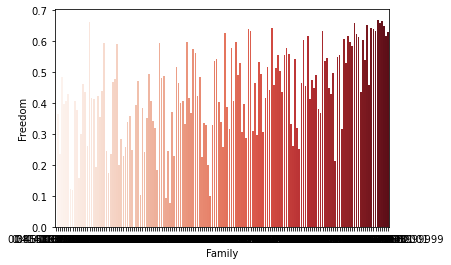

In [19]:
sns.barplot(x='Family',y='Freedom',data=df,palette='Reds')

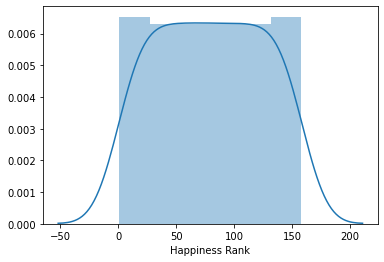

In [20]:
sns.distplot(df['Happiness Rank'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000FC49E421F0>,
      dtype=object)

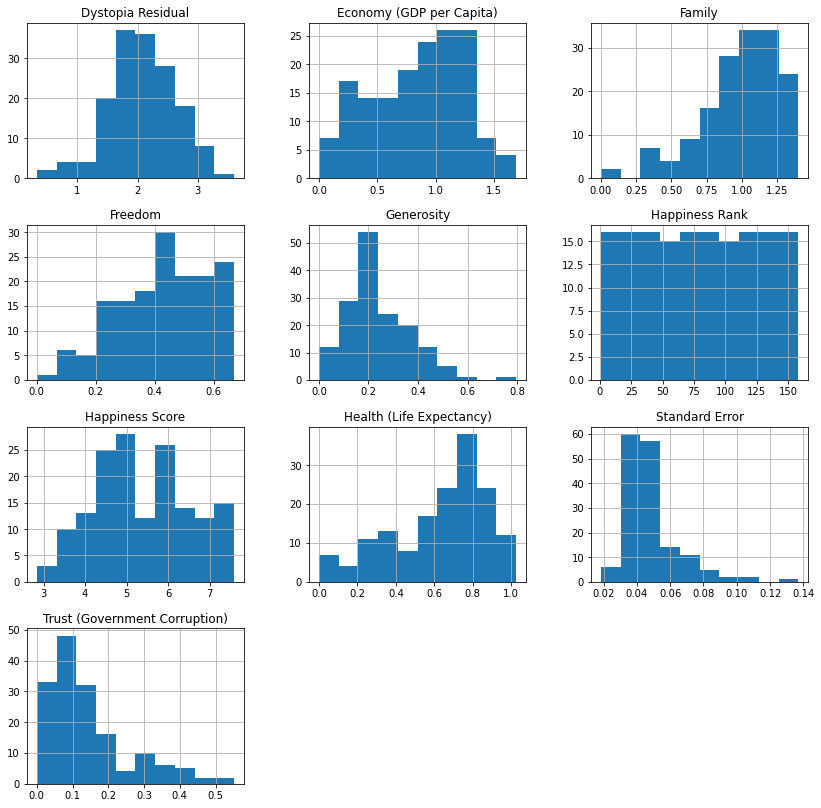

In [21]:
df.hist(figsize=(14,14))

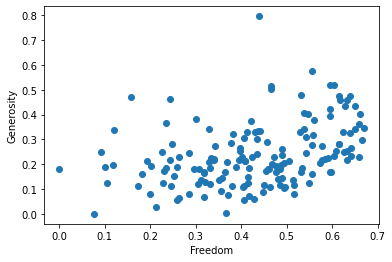

In [22]:
plt.scatter(df.Freedom,df.Generosity)
plt.xlabel('Freedom')
plt.ylabel('Generosity')
plt.show()

In [23]:
for col in df.columns:
    if df[col].dtypes=='object':
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col])

In [24]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]
new_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [25]:
print("Original shape=",df.shape, "\nNew shape=",new_df.shape )

Original shape= (158, 12) 
New shape= (149, 12)


In [26]:
new_df.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [27]:
x=new_df.drop("Dystopia Residual",axis=1)
y=new_df["Dystopia Residual"]

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(x)

In [29]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0
for i in range (30,200):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu: 
        accu=tempaccu
        best_rstate=i
            
print (f"best accuracy {accu*100} found on random_state{best_rstate}")              

best accuracy 99.99998361728291 found on random_state40


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.25,random_state=104)

In [31]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100}, Cross_val_score= {cvscore*100}, & difference= {(r2score*100)-(cvscore*100)}")

Accuracy=99.99996919371623, Cross_val_score= 99.99996390749608, & difference= 5.2862201442849255e-06


In [32]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100}, Cross_val_score= {cvscore*100}, & difference= {(r2score*100)-(cvscore*100)}")

Accuracy=47.256095036004595, Cross_val_score= 58.77711828999293, & difference= -11.521023253988332


In [33]:
from sklearn.ensemble import AdaBoostRegressor
ADB=AdaBoostRegressor()
ADB.fit(x_train,y_train)
y_pred=ADB.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100}, Cross_val_score= {cvscore*100}, & difference= {(r2score*100)-(cvscore*100)}")

Accuracy=43.288967502020185, Cross_val_score= 59.263178326283125, & difference= -15.97421082426294


In [34]:
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100}, Cross_val_score= {cvscore*100}, & difference= {(r2score*100)-(cvscore*100)}")

Accuracy=99.99996919371623, Cross_val_score= 90.66392182842314, & difference= 9.336047365293084


In [35]:
parameters= {"max_iter":[500,700,900,1100,1200,1300,1400,1500],
            "alpha":[0.0001,0.001,0.01,0.1,1,10,100],
             "penalty":["elasticnet","l1","l2"]}

In [36]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(SGDRegressor(),parameters,cv=5,scoring='r2')
GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(x_test)

print("Final accuracy:", r2_score (y_test,GCV_pred)*100)

Final accuracy: 91.22739314520545


In [37]:
import joblib
joblib.dump(GCV.best_estimator_,"World Happiness Report.pkl")

['World Happiness Report.pkl']